## The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1.
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [1]:
def hire_assistant(applicants):
    """
    Return the number of assistant hired.
    Inputs:
    - applicants: a list of the numbers that represent the level of qualification of 
    the applicants; the higher the number, the better qualified
    
    Outputs:
    - hires: Number of assistants hired
    """
    best = float("-inf")
    hire = 0 #initilializing the count of applicants hired
    
    for i in applicants: #testing each new applicant picked with the best so far
        
        if i > best: 
            best = i #updating the best hired
            hire += 1 #incrementing the count when hired
    
    return hire #returns number of hired
    raise NotImplementedError()

In [2]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2. 
Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

In [3]:
import random
import numpy as np

def experimental_hires(N): 
    
    hired = 0 #initilializing the count of applicants hired
    applicants_list = list(range(N))  #creating an empty applicants list
    np.random.shuffle(applicants_list) 
    
    for i in range(0,N): #simulating hiring N times
        random.shuffle(applicants_list) #shuffling the list for randomness
        hired += hire_assistant(applicants_list) #for each new random arrangement conducting a hiring test
    
    return hired/N

## Question 3.

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [4]:
def analytical_hires(N):
    """
    Return the analytical expected number of hires if there are N applicants
    Inputs:
    - N: Number of applicants
    Outputs:
    - hires: Average number of assistants hired
    """
    # from the textbook, we know that the analytical result is 
    # 1 + 1/2 + 1/3 + ... + 1/N
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

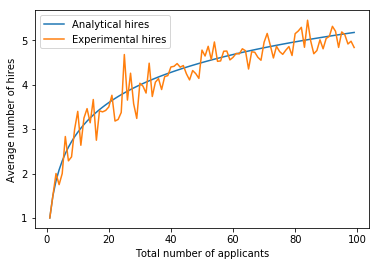

In [6]:
import matplotlib.pyplot as plt 

curve1_x, curve1_y, curve2_x, curve2_y = [],[],[],[] #initializng points
applicant_count = list(range(1,100)) #set of count of applicants

for i in applicant_count:
    
    curve1_y.append(analytical_hires(i)) #getting axis points for curve 1
    curve1_x.append(i)
    
    curve2_y.append(experimental_hires(i)) #getting axis points for curve 2
    curve2_x.append(i)

plt.plot(curve1_x,curve1_y, label = "Analytical hires") #plotting graph
plt.plot(curve2_x,curve2_y, label = "Experimental hires")
plt.xlabel("Total number of applicants")
plt.ylabel("Average number of hires")
plt.legend()
plt.show()

# Question 4.

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

Text(0.5,0,'Applicants')

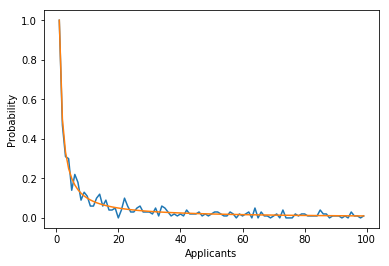

In [7]:
import math

def experimental_hire_1(N): #defines experimental hire function for exactly 1 hire
    runs = 100 #exactly as experimental hire
    hired_assistants = 0
    for i in range(runs):
        applicants = [random.uniform(0, 1) for i in range(N)]
        if hire_assistant(applicants) == 1:  #if result of hire assistant function returns exactly 1 hire
            hired_assistants += 1 #step up the counter of exactly 1 hire
    return(hired_assistants/runs)  #returns the probability of 1 hire among all runs

applicants = 100 #defines number of applicants

eh1_avg = [] #creates storage for empircal approach for each number of applicants
ah1_avg = [] #creates storage for avg number of analytical

for i in range(1, applicants): #loops through number of applicants from 1, due to factorial
    eh1_avg.append(experimental_hire_1(i))  #empirical approach to add to storage of probability
    #analytical: probablity for the first one being the best (n!) & all the others being worse (n-1)!
    ah1_avg.append(math.factorial(i-1)/math.factorial(i))

#plotting both
plt.plot([i for i in range(1,applicants)],eh1_avg, label = "Experimental hires")
plt.plot([i for i in range(1,applicants)],ah1_avg, label = "Analytical hires")
plt.ylabel('Probability')
plt.xlabel('Applicants')

## Question 5.
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (ie. at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [8]:
# assumptions 
# the fee 'Y' is split into Ci and Ch: interview cost and hiring cost, respectively

def optimal_stopping(applicants,m,x,ci,ch,z):
    
    q = 10 #quality of hired
    remaining,interviewed = 0,0 #remaining and interviewed applicants 
    
    for i in applicants:
        remaining = len(applicants)-interviewed
        if x*m/q > ci*(remaining) + analytical_hires(remaining)*(ch+z): #if (interviewing more applicants) and (estimating more hires+cost using analytical method) will cost less
            interviewed+=1
            if i > q:
                q = i
        else: #if interviewing more applicants might cost us more than just keeping the current one to do the job, stop interviewing
            break
            
    return interviewed #total interviewed applicants will give us the stopping point